In [1]:
def TakeNClean(rootOfFrame): #функция для забора данных из файлов и их очистки
    import pandas as pd

    df = pd.read_excel(rootOfFrame)

    df = df.rename(columns=df.iloc[0]) #перетаскиваем первую строку в хедер столбцов
    df = df.set_index('Date') #перетаскиваем первый столбец в хедер строк

    del df['PX_OPEN'] #нам нужна только колонка цен закрытия, так что остальное удаляем
    del df['PX_HIGH']
    del df['PX_LOW']

    df = df.drop(['Date']) #удаляем первую строку продублированную в хедере
    dfList = df['PX_LAST'].tolist() #кидаем данные в массив
    
    lastPrice = 0
    #проверка на NT
    for i in range (len(dfList)):
        
        if (isinstance(dfList[i], str) == 0):
            lastPrice = dfList[i]
        else:
            dfList[i] = lastPrice
    print(rootOfFrame, "\n")
    return (dfList)


In [5]:
TakeNClean('C:/Users/JetOctober/Downloads/Bloomberg data-20181030T173234Z-001/Bloomberg data/audusd data.xlsx') #проверка

C:/Users/JetOctober/Downloads/Bloomberg data-20181030T173234Z-001/Bloomberg data/audusd data.xlsx 



[0.7219,
 0.7227,
 0.7261,
 0.7258,
 0.7264,
 0.7333,
 0.7265,
 0.7278,
 0.7375,
 0.7336,
 0.7229,
 0.7209,
 0.7153,
 0.7082,
 0.7045,
 0.7028,
 0.7014,
 0.6988,
 0.6999,
 0.7024,
 0.7005,
 0.7012,
 0.7076,
 0.7127,
 0.7189,
 0.7147,
 0.7186,
 0.7106,
 0.714,
 0.7092,
 0.7068,
 0.7022,
 0.7029,
 0.6932,
 0.6908,
 0.7025,
 0.7028,
 0.7036,
 0.7119,
 0.7173,
 0.7165,
 0.7086,
 0.7183,
 0.722,
 0.7316,
 0.7347,
 0.7323,
 0.7337,
 0.7386,
 0.7379,
 0.7358,
 0.7383,
 0.7291,
 0.7419,
 0.7418,
 0.7346,
 0.7346,
 0.7419,
 0.7268,
 0.7308,
 0.7283,
 0.7312,
 0.7327,
 0.7296,
 0.7282,
 0.7368,
 0.7372,
 0.7444,
 0.7377,
 0.7371,
 0.7417,
 0.7367,
 0.7452,
 0.7415,
 0.7446,
 0.7439,
 0.7434,
 0.7426,
 0.7517,
 0.7523,
 0.7634,
 0.7662,
 0.7709,
 0.7686,
 0.7655,
 0.7744,
 0.7705,
 0.7724,
 0.7732,
 0.7772,
 0.7812,
 0.7667,
 0.7749,
 0.777,
 0.7731,
 0.7728,
 0.7754,
 0.7673,
 0.7649,
 0.7623,
 0.7685,
 0.7785,
 0.7777,
 0.7603,
 0.7645,
 0.7644,
 0.771,
 0.7744,
 0.7828,
 0.7823,
 0.7887,
 0.78

In [2]:
import os  #загрузка имен анализируемых файлов
rootOfDir = 'C:/Users/JetOctober/Downloads/Bloomberg data-20181030T173234Z-001/Bloomberg data/' #папка с файлами
data_files = [(x[0], x[2]) for x in os.walk(rootOfDir)] 
listOfNames = data_files[0][1]
countOfPapers = len(listOfNames)

In [3]:
listWithLists = []
for i in range(countOfPapers):
    listWithLists.append(TakeNClean(rootOfDir + listOfNames[i]))
print ("Datas are in lists!")

    

C:/Users/JetOctober/Downloads/Bloomberg data-20181030T173234Z-001/Bloomberg data/audusd data.xlsx 

C:/Users/JetOctober/Downloads/Bloomberg data-20181030T173234Z-001/Bloomberg data/Brent data.xlsx 

C:/Users/JetOctober/Downloads/Bloomberg data-20181030T173234Z-001/Bloomberg data/Canola data.xlsx 

C:/Users/JetOctober/Downloads/Bloomberg data-20181030T173234Z-001/Bloomberg data/Cocoa data.xlsx 

C:/Users/JetOctober/Downloads/Bloomberg data-20181030T173234Z-001/Bloomberg data/Coffe data.xlsx 

C:/Users/JetOctober/Downloads/Bloomberg data-20181030T173234Z-001/Bloomberg data/copper data.xlsx 

C:/Users/JetOctober/Downloads/Bloomberg data-20181030T173234Z-001/Bloomberg data/corn data.xlsx 

C:/Users/JetOctober/Downloads/Bloomberg data-20181030T173234Z-001/Bloomberg data/Cotton data.xlsx 

C:/Users/JetOctober/Downloads/Bloomberg data-20181030T173234Z-001/Bloomberg data/DAX data.xlsx 

C:/Users/JetOctober/Downloads/Bloomberg data-20181030T173234Z-001/Bloomberg data/e-mini snp data.xlsx 

C:/U

In [17]:
import numpy as np

In [34]:
import pandas as pd
df_ = pd.DataFrame(index = listOfNames, columns = listOfNames ) #создание пустой ковариационной матрицы n x n
df_ = df_.fillna(0.0)

In [35]:
df_

,audusd data.xlsx,Brent data.xlsx,Canola data.xlsx,Cocoa data.xlsx,Coffe data.xlsx,copper data.xlsx,corn data.xlsx,Cotton data.xlsx,DAX data.xlsx,e-mini snp data.xlsx,...,t-notes 2 y data.xlsx,TYVIX data.xlsx,usdcad data.xlsx,usdjpy data.xlsx,VDAX data.xlsx,VIX.xlsx,Wheat data.xlsx,Wheat-Corn Spread data.xlsx,WTI data.xlsx,WTI-BRENT Spread data.xlsx
audusd data.xlsx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brent data.xlsx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Canola data.xlsx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cocoa data.xlsx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Coffe data.xlsx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
copper data.xlsx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
corn data.xlsx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cotton data.xlsx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DAX data.xlsx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
e-mini snp data.xlsx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
df_.loc['Coffe data.xlsx']['copper data.xlsx'] #метод обращения к клеткам!

0

In [18]:
x = np.array([0, 1, 2])
y = np.array([1, 2, 4])

In [20]:
a = np.corrcoef(x, y)[0][1] #КОРРЕЛЯЦИЯ
a

0.9819805060619659

In [15]:
volumeOfDatas = [] #проверяем длины массивов для редакции
for i in range(countOfPapers):
    volumeOfDatas.append(len(listWithLists[i]))
volumeOfDatas

[5427,
 5427,
 5427,
 5427,
 5427,
 5427,
 5427,
 5427,
 5427,
 5427,
 5427,
 5427,
 5427,
 5427,
 5427,
 5427,
 5427,
 5427,
 5427,
 5427,
 5427,
 5427,
 5427,
 5427,
 5427,
 5427,
 5427,
 5427,
 5427,
 5427,
 5427,
 5427,
 5427,
 5427,
 5427,
 5427,
 5427,
 5427,
 5427,
 5427]

In [8]:
volumeOfDatas.index(4726)

9

In [9]:
volumeOfDatas.index(5425)

27

In [10]:
listOfNames[9]


'e-mini snp data.xlsx'

In [11]:
listOfNames[27]

'SPX data.xlsx'

In [12]:
buf = [] #коррекция минисп, вставили 1 с 95 по 97 год, чтобы массив не влиялд на корреляцию
for i in range (701):
    buf.append(1)
for i in range (4726):
    buf.append(listWithLists[9][i])
listWithLists[9] = buf

buf = [1, 1] #таже сама редакция
for i in range (5425):
    buf.append(listWithLists[27][i])
listWithLists[27] = buf

In [13]:
buf = [1, 1] #таже сама редакция
for i in range (5425):
    buf.append(listWithLists[27][i])
listWithLists[35] = buf

In [36]:
for i in range(countOfPapers):
    for j in range(countOfPapers - i):
        df_.loc[listOfNames[i]][listOfNames[j + i]] = np.corrcoef(listWithLists[i], listWithLists[j+i])[0][1] 
#размеры массивов то не совпадают!

In [30]:
countOfPapers

40

In [37]:
df_ #готово!

,audusd data.xlsx,Brent data.xlsx,Canola data.xlsx,Cocoa data.xlsx,Coffe data.xlsx,copper data.xlsx,corn data.xlsx,Cotton data.xlsx,DAX data.xlsx,e-mini snp data.xlsx,...,t-notes 2 y data.xlsx,TYVIX data.xlsx,usdcad data.xlsx,usdjpy data.xlsx,VDAX data.xlsx,VIX.xlsx,Wheat data.xlsx,Wheat-Corn Spread data.xlsx,WTI data.xlsx,WTI-BRENT Spread data.xlsx
audusd data.xlsx,1.0,0.851836,0.741342,0.686541,0.735170,0.874021,0.853939,0.623112,0.387785,0.130652,...,0.594276,-0.519904,-0.920523,-0.719318,-0.381918,0.301413,0.823480,0.068914,0.824160,-0.688206
Brent data.xlsx,0.0,1.000000,0.664737,0.741279,0.524974,0.929042,0.810337,0.418022,0.618093,-0.024308,...,0.617089,-0.561123,-0.906923,-0.608698,-0.217507,0.540446,0.810411,0.117770,0.989644,-0.682414
Canola data.xlsx,0.0,0.000000,1.000000,0.668556,0.580477,0.646951,0.894045,0.568805,0.300916,0.093858,...,0.695117,-0.149583,-0.605733,-0.528594,-0.015603,0.171045,0.849564,0.227177,0.619849,-0.648679
Cocoa data.xlsx,0.0,0.000000,0.000000,1.000000,0.546524,0.753116,0.657567,0.429571,0.539104,-0.128118,...,0.816500,-0.334990,-0.715730,-0.458218,0.026403,0.415281,0.694579,0.291742,0.731533,-0.506802
Coffe data.xlsx,0.0,0.000000,0.000000,0.000000,1.000000,0.605346,0.649633,0.749076,0.269416,0.167930,...,0.381659,-0.214894,-0.592182,-0.558841,-0.190387,0.143487,0.560115,0.022655,0.478737,-0.553537
copper data.xlsx,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.784434,0.492217,0.599431,-0.015895,...,0.539341,-0.597665,-0.941119,-0.590896,-0.287923,0.486313,0.824857,0.225031,0.920431,-0.618138
corn data.xlsx,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.608662,0.399088,0.167814,...,0.642502,-0.312768,-0.754476,-0.677718,-0.137797,0.271095,0.880916,0.159094,0.758806,-0.777214
Cotton data.xlsx,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.121360,0.161535,...,0.360082,-0.085997,-0.455279,-0.588331,-0.242729,-0.008110,0.500112,0.066435,0.378370,-0.473103
DAX data.xlsx,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.521307,...,0.367844,-0.524174,-0.472739,-0.086035,-0.199421,0.939750,0.427664,0.231407,0.600536,-0.458208
e-mini snp data.xlsx,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,-0.040047,0.222186,-0.065715,-0.315234,0.173838,-0.552314,0.050433,-0.270827,-0.044402,-0.102240


In [31]:
import matplotlib.pyplot as plt
from pandas.tools.plotting import table

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, df_)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.
  


In [40]:
#TODO
#find the most biggest correlations

In [116]:
a = df_.to_html('table.html')

In [117]:
type (a)

NoneType

In [118]:
import matplotlib.pyplot as plt
import six

In [119]:
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

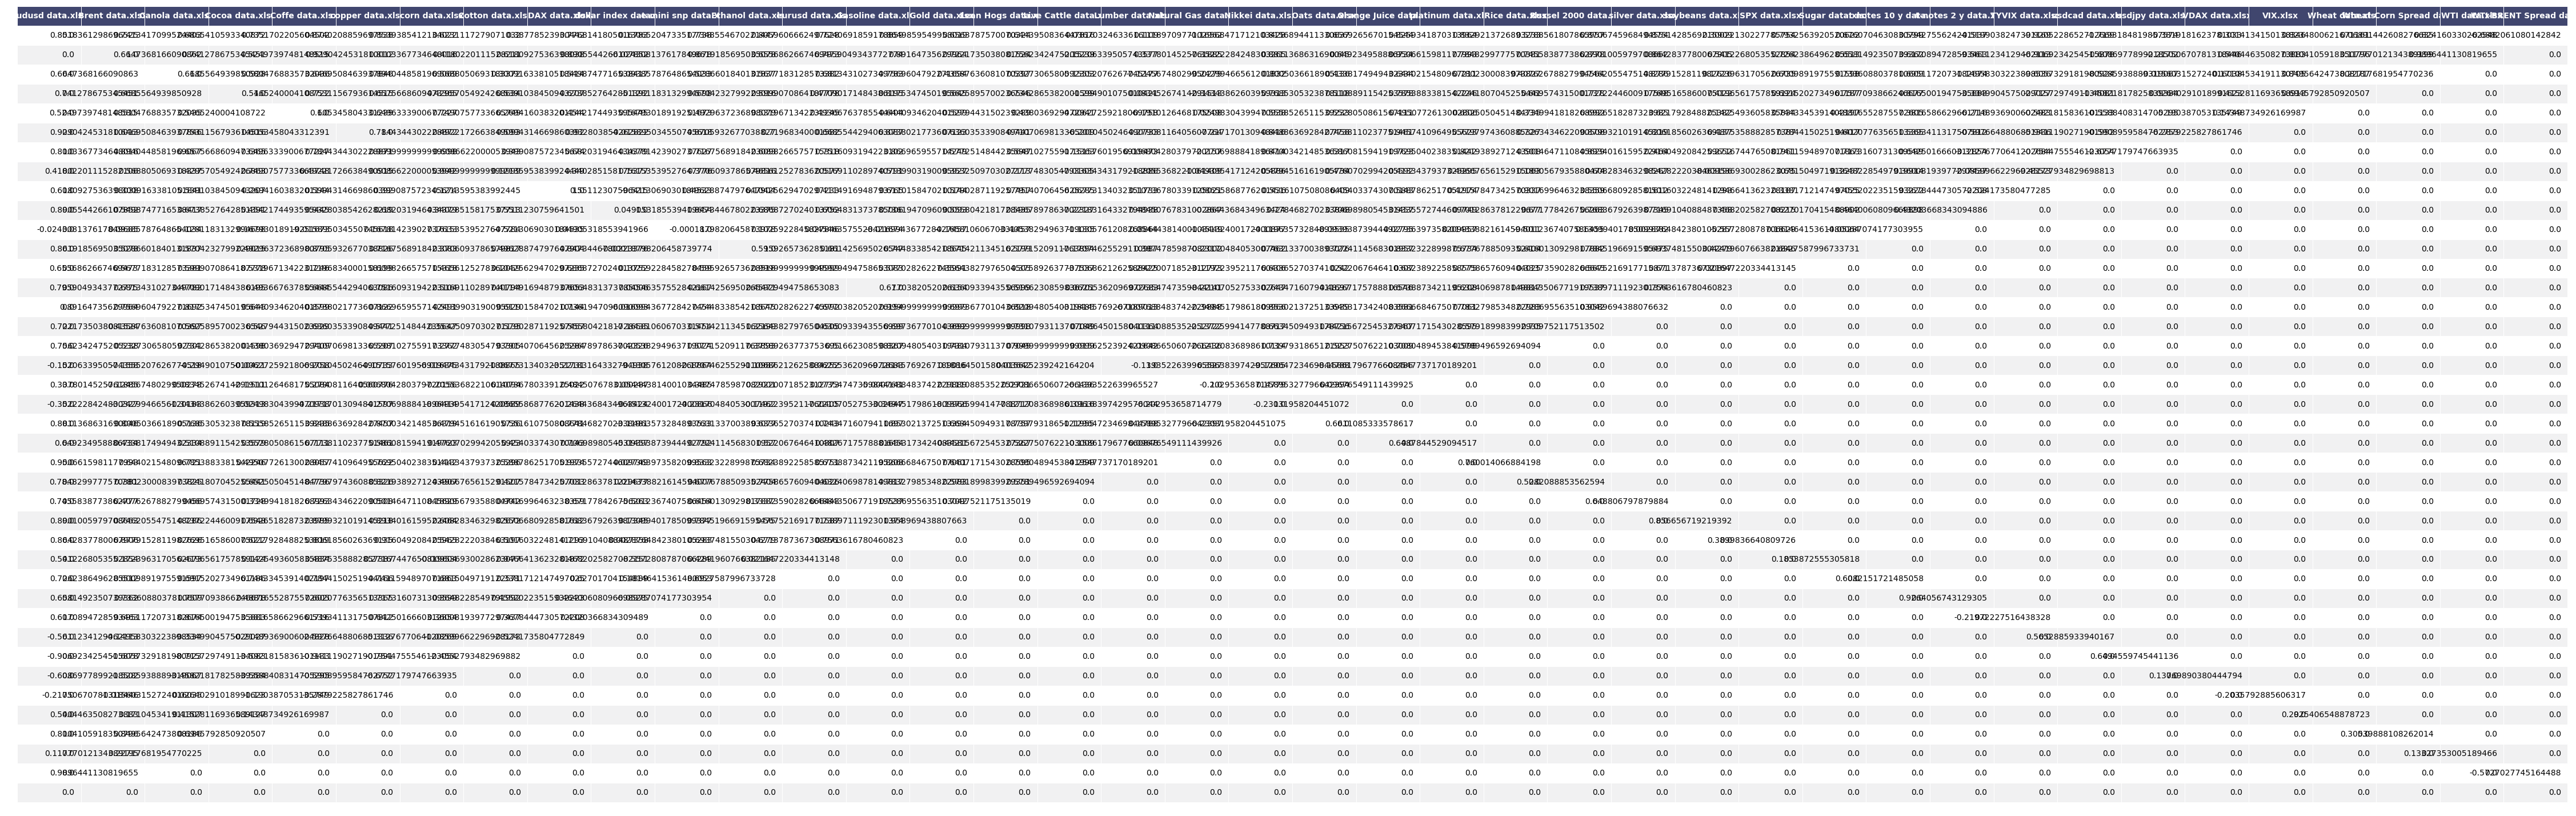

In [120]:
render_mpl_table(df_, header_columns=0, col_width=2.0)

In [127]:
#РЕШИТЬ ПРОБЛЕМУ ОКРУГЛЕНИЯ, СДЕЛАТЬ НОРМАЛЬНУЮ ТАБЛИЦУ!

In [130]:
a = '%.2f' % round(n, 3)

In [131]:
type (a)

str